# Intro to Pandas

### Data Structures

* **DataFrame**: rows and columns (like a spreadsheet)
* **Series**: a single column

Full intro [here](http://pandas.pydata.org/pandas-docs/stable/dsintro.html)

In [22]:
import pandas as pd
import numpy as np

#Series
#A one-dimensional labeled array capable of holding any data type:
#integers, strings, floats, Python objects

s = pd.Series([1,2,3])                                #auto generate index (by default 0,1,2...)
s = pd.Series([1,2,3], index=['One','Two','Three'])   #manually assign index for each row


#DataFrame
#A 2-dimensional labeled data structure with columns of potentially different types. 
#You can think of it like a spreadsheet or SQL table, or a dict of Series objects. 

'''
Inputs:
    Dict of 1D lists, dicts, or Series
    2-D numpy.ndarray
    A Series
    Another DataFrame
'''

# From dictionary of lists (or Series)
data = {'one' : [1., 2., 3.],
        'two' : [1., 2., 3.]}
df = pd.DataFrame(data)
df

,one,two
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0


### Read Data From File

In [23]:
DATA_DIR = "data/"

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv(DATA_DIR+'train.csv', header=0)  #Returns Pandas DataFrame

# read CSV file directly from a URL and save the results
url_data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

### Viewing Data

In [3]:
df.info()      #Metadata about table
df.columns
df.values
df
df.head(2)
df.tail(2)
df.sort_values(by='Age').head(3)
df.shape       # count of (rows, columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(891, 12)

### Select by Index

In [129]:
df.columns.get_loc("Age")     #Get column index by name
df.iloc[0]                    #Get row by index
df[0:3]                       #Get rows 0-2
df.iloc[:,2]                  #Get all column 2 data
df.iloc[3,3]                  #Get value in cell (1,1)
df.iloc[[1,2,5],[1,5]]        #Get rows 1,2,5 and display columns 1 and 5

,Survived,Age
1,1,38.0
2,1,26.0
5,0,NaN


### Select by Name

In [170]:
df['Survived']                  #Get column by name
df['Age'][0:3]                  #Select first 3 rows in Age column
df[['Age','Sex']][0:3]          #Select first 3 rows in Age and Sex columns
#Alternative
#df.loc[0:2,'Age']               #Select first 3 rows in Age column - index INCLUSIVE!
#df.loc[0:2,['Sex','Age']]       #Select first 3 rows in Sex and Age columns

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female


### Updating Tables

In [290]:
df2 = df.copy()                           #Create copy
df2["NewColumn"] = "DefaultValue"         #Create new column
df2['Sex'] = "Unknown"                    #Override all values in column
df2.iat[0,0] = 9999                       #Set value by index (row,col)
df2.at[3,'Pclass'] = 7777                 #Set value in row 2, col 'Pclass'
df2[df2.SibSp == 1] = "OVERRIDE"          #Set all values in rows with 1 sibling to OVERRIDE

# Set column matching query
df.loc[(df.Age.isnull()) & (df.Sex=="female") & (df.Pclass==1),'Age'] = "NEW_VALUE"

### Basic Statistics

In [291]:
#Only works on numerical columns
#Ignores missing values

df.describe()     #Summary stats
df.mean()         #Mean for all rows in a column
df.mean(1)        #Mean for all cells in a row     **transposed
df.sum()          #Sum for all rows in a column
df.count()        #Count for all rows in a column (non-null)

df['Embarked'].unique()    #Get unique values
df['Embarked'].nunique()   #Get count of unique, non-null values
df['Embarked'].mode()[0]   #Mode is weird, you need to extract the value

'S'

### Filtering

In [175]:
#Queries return DataFrames

res = df[df.Age < 10]                       #Get rows that match condition
assert type(res) == pd.core.frame.DataFrame

df[df.Age < 10][['Sex', 'Age']][:3]         #Same, but return only 2 columns and 3 rows

df[df['Embarked'].isin(['S','C'])][:3]      #Get rows where Embarked is S or C

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Querying

In [286]:
#Simple query
df[ (df['Sex'] == 'male') & (df['Pclass'] == 1) ]     #Return males in Pclass 1

#Complex Queries

#Create new column equal to query
df['FancyName'] = np.where(
    (
        (df.Name.str.contains("Master.")) 
        | (df.Name.str.contains("Rev.")) 
        | (df.Name.str.contains("Dr."))
        | (df.Name.str.contains("Dr.")) 
        | (df.Name.str.contains("Sir."))
    ),
    True,
    False
)

#Get all rows equal to query
upper_class_men = df.loc[ 
    (df.Sex.str.lower() == "male") & (
        (df.Name.str.contains("Master.")) 
        | (df.Name.str.contains("Rev.")) 
        | (df.Name.str.contains("Dr."))
        | (df.Name.str.contains("Dr.")) 
        | (df.Name.str.contains("Sir.")) 
    )
][['Fare','Age','Survived']]
upper_class_men.mean()

Fare        42.257604
Age         15.032745
Survived     0.473684
dtype: float64

### Missing Values

In [287]:
#Pandas uses the value np.nan to represent missing data
#These methods return a copy of the DataFrame without modifying it

df3 = df.copy()                               #Just to be extra safe ;)
df3.isnull().sum()                            #Show # of null values in each Column
df3[df3.Age.isnull()][['Name','Age']]         #Show rows where Age is null
df3.isnull()                                  #Return True/False if cell is null
df3.fillna(value={"Cabin":"DEFAULT_CABIN"})   #Set null values in column to default value 
df3.dropna(how='any')                         #Drop rows with missing data in ANY cell
df3.fillna(value="DEFAULT").head(2)           #Fill cells missing data w 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,SurvivalPct,FancyName
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,DEFAULT,S,1,0.0,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,0.5,False


### Data Cleaning

In [276]:
df4 = df.copy()

#New column
df4['SurvivalPct'] = df4['Survived'] / df4['PassengerId']   #New column based on values in other columns
df4['Gender'] = df4['Sex'].map( lambda x: x[0].upper() )    #New column Gender with M or F
df4['Gender'] = df4['Sex'].map( {'male':1,'female':0} )     #Update Gender values to 0 or 1

#Drop Row
df4 = df4.drop(0)
df4[['Name','Sex','Age']].head(3)

#Drop Column
df4 = df4.drop('Age',1)         # 1 means Column axis

df4.head(3)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,SurvivalPct
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,0,0.500000
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.333333
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,0,0.250000


### Group By

In [279]:
df.groupby('Sex').sum()                    #For each column, return sum of all rows that equal 'female'
df.groupby(['Sex','Embarked']).mean()      #Group by multiple columns
df.groupby('Embarked').Fare.mean()         #Get the mean fare price for each Embarked category
df[df['Sex'] == 'female'].groupby('Embarked').Survived.sum()    #Query THEN group

Embarked
C     64
Q     27
S    140
Name: Survived, dtype: int64

### Histogram

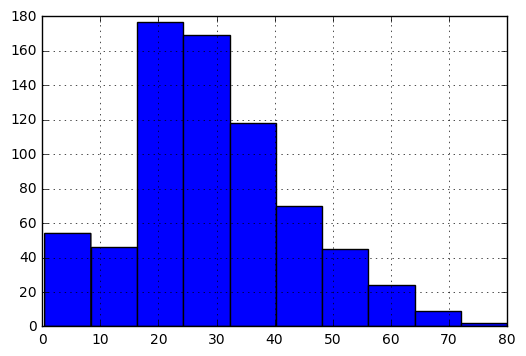

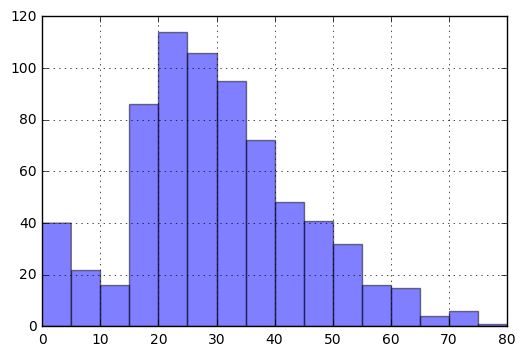

In [185]:
import pylab

# Pandas auto-generates buckets
df['Age'].hist()
pylab.show()

# Set specific buckets

df['Age'].dropna().hist(bins=16, range=(0,80), alpha=.5)
pylab.show()

### Plots

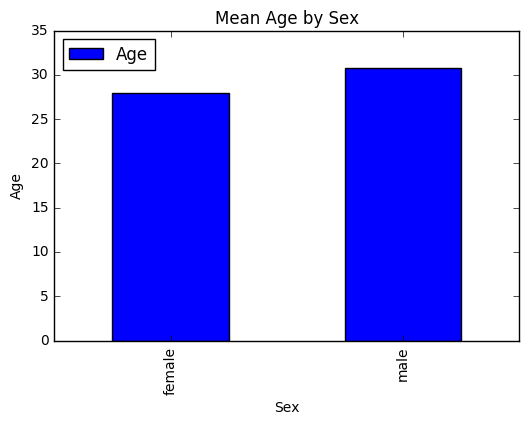

In [219]:
import matplotlib.pyplot as plt

sex_group = df[['Sex','Age']].groupby('Sex')
sex_group.size()

total_passengers = sex_group.mean()
myplot = total_passengers.plot(kind='bar', title="Mean Age by Sex")
myplot.set_xlabel("Sex")
myplot.set_ylabel("Age")
plt.show()

### Pivot Tables

In [271]:
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html

'''
1. Pivot on Age (the value we perform calculations on)
2. Group by Sex and Embarked
3. Include statistics: sum, mean, and count
4. Show totals at bottom!
'''
pd.pivot_table(df, values='Age', index=['Sex', 'Embarked'], aggfunc=[np.sum, np.mean, np.count_nonzero], margins=True)

sum       mean  count_nonzero
Sex    Embarked                                    
female C          1729.00  28.344262           73.0
       Q           291.50  24.291667           36.0
       S          5165.50  27.771505          203.0
male   C          2276.92  32.998841           95.0
       Q           495.00  30.937500           41.0
       S         11147.25  30.291440          441.0
All              21105.17  29.642093          712.0

### Aggregations

In [285]:
#Simple Aggregation
df.groupby('Embarked').aggregate({'Survived':np.sum, 'Age':np.mean})


#Complex Aggregation
aggregations = {
    'Survived': { # work on the "Survived" column
        'total_passengers': 'count',  # get count, and call this result 'total_passengers'
        'total_survived': 'sum', # get sum, call result 'total_survived'
        'mean_survival': 'mean',
        'survival_percent': lambda x: float(sum(x)) / len(x)
    },
    'Fare': {     # Now work on the "Fare" column
        'max_fare': 'max',   # Find the max, call the result "max_fare"
        'min_fare': 'min',
        'total_of_all_fares': 'sum',
        'fare_range': lambda x: max(x) - min(x)  # Calculate the fare range per group
    },
    'Age': ["count", "max"]  # Calculate two results for 'Age' column
}
 
df.groupby('Sex').agg(aggregations)

Fare                                         Age        \
       fare_range total_of_all_fares  max_fare min_fare count   max   
Sex                                                                   
female   505.5792         13966.6628  512.3292     6.75   261  63.0   
male     512.3292         14727.2865  512.3292     0.00   453  80.0   

               Survived                                                
       survival_percent total_survived mean_survival total_passengers  
Sex                                                                    
female         0.742038            233      0.742038              314  
male           0.188908            109      0.188908              577

### Write to file

In [293]:
df.head()
df.to_csv(DATA_DIR+"pandastutorial.csv", index=False)